<a href="https://colab.research.google.com/github/Thony2311/IA/blob/main/Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <p align=center>**Métodos de clasificación. Miniproyecto 2 Fundamentos y Aplicaciones de I.A.**

---


#### <p align=center>Anthony Alzate Muriel
#### <p align=center>2019

#Información del Dataset

En este proyecto se trabajará con el dataset llamado "Zoo Data Set", el cual busca estimar a que familia o categoria pertenece cada animal (según la clasificación de los seres vivos) a partir de un conjunto de atributos propios de cada especie. Siguiendo este objetivo, se tiene una única salida (type) que divide en 7 clases, según la información proporcionada por el dataset, la cual se presentan a continuación.
* Clase 1: Mamíferos (antílope, oso, jabalí, búfalo, venado, delfín, elefante, jirafa, cabra, gorila, hámster, león, lince, etc.)
* Clase 2: Aves (pollo, cuervo, paloma, pato, flamenco, gaviota, halcón, avestruz, perico, pingüino, gorrión, cisne, buitre, etc.)
* Clase 3: Reptiles (pitviper, serpiente marina, lombriz lenta, tortuga, tuatara)
* Clase 4: Peces (lubina, carpa, bagre, chub, pez perro, eglefino, arenque, lucio, piraña, atún, etc.)
* Clase 5: Anfibios (rana , tritón, sapo)
* Clase 6: Insectos (pulgas, mosquitos, abejas, moscas domésticas, mariquitas, polillas, termitas, avispas)
* Clase 7: Otros invertebrados (almejas, cangrejos, langostas, pulpos, escorpiones, babosas, estrellas de mar, gusanos, etc.)

Por otro lado, se consideraran los siguientes parámetros de entrada, los cuales en su mayoria corresponden a variables binarias o booleanas, es decir que si el animal tiene ese atributo se le asigna un valor de 1, de lo contrario 0.
1. Animal name (Nombre del animal): único para cada instancia
2. Hair (Pelo): booleano
3. Feathers (Plumas): booleano
4. Eggs (Huevos): booleano
5. Milk (Leche): booleano
6. Airbone (Volador): booleano
7. Aquatic (Acuático): booleano
8. Predator (Depredador): booleano
9. Toothead (Dentado): booleano
10. Backbone (Columna vertebral): booleano
11. Breathes (Respira): booleano
12. Venomous (Venenoso): booleano
13. Fins (Aletas): booleano
14. Legs (Patas): Número (valores: 0, 2, 4, 5, 6, 8)
15. Tail (Cola): Booleano
16. Domestic (Doméstico): Booleano
17. Catsize (Tamaño de gato): Booleano

En primer lugar se importan las librerias necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

Se carga el dataset

In [ ]:
zoo = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data",
                 names = ["Hair","Feathers","Eggs","Milk","Airborn","Aquatic","Predator","Thootead","Backbone","Breathes","Venomous","Fins","Legs","Tail","Domestic","Catsize","Type"])
zoo.head()


,Hair,Feathers,Eggs,Milk,Airborn,Aquatic,Predator,Thootead,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, aardvark to wren
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Hair      101 non-null    int64
 1   Feathers  101 non-null    int64
 2   Eggs      101 non-null    int64
 3   Milk      101 non-null    int64
 4   Airborn   101 non-null    int64
 5   Aquatic   101 non-null    int64
 6   Predator  101 non-null    int64
 7   Thootead  101 non-null    int64
 8   Backbone  101 non-null    int64
 9   Breathes  101 non-null    int64
 10  Venomous  101 non-null    int64
 11  Fins      101 non-null    int64
 12  Legs      101 non-null    int64
 13  Tail      101 non-null    int64
 14  Domestic  101 non-null    int64
 15  Catsize   101 non-null    int64
 16  Type      101 non-null    int64
dtypes: int64(17)
memory usage: 14.2+ KB


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
zoo1=pd.read_excel('/content/drive/MyDrive/Parcial2_Data_set.xlsx')
zoo1.head()

Mounted at /content/drive


,Animal name,Hair,Feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
zoo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Animal name  101 non-null    object
 1   Hair         101 non-null    int64 
 2   Feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


#Normalización de los datos

Se definen las variables de entrada y salida según la posición de la columna en el dataset

In [ ]:
dataset = zoo1.values

X = dataset[:,1:16] # las variables desde la columna 1 hasta la 16 serán la entrada X, se omite la columna 0 que corresponde al nombre del animal porque es tipo string
Y = dataset[:,17] # Y es la variable a estimar o salida, que corresponde a la clasificación del animal

print(X)
print(Y)

[[1 0 0 ... 4 0 0]
 [1 0 0 ... 4 1 0]
 [0 0 1 ... 0 1 0]
 ...
 [1 0 0 ... 4 1 0]
 [0 0 1 ... 0 0 0]
 [0 1 1 ... 2 1 0]]
[1 1 4 1 1 1 1 4 4 1 1 2 4 7 7 7 2 1 4 1 2 2 1 2 6 5 5 1 1 1 6 1 1 2 4 1 1
 2 4 6 6 2 6 2 1 1 7 1 1 1 1 6 5 7 1 1 2 2 2 2 4 4 3 1 1 1 1 1 1 1 1 2 7 4
 1 1 3 7 2 2 3 7 4 2 1 7 4 2 6 5 3 3 4 1 1 2 1 6 1 7 2]


In [ ]:
 Xn=X
 Yn= Y

 scaler1 = MinMaxScaler()
 scaler1.fit(Xn)
 Xn=scaler1.transform(Xn)

 #scaler2 = MinMaxScaler() no se estandariza la salida para conservar la salida de clase en su valor original, es decir un numero entero entre 1 y 7
 #Yn = Yn.reshape(-1, 1)
 #scaler2.fit(Yn)
 #Yn=scaler2.transform(Yn)

print(Xn)
print(Yn)

[[1.   0.   0.   ... 0.5  0.   0.  ]
 [1.   0.   0.   ... 0.5  1.   0.  ]
 [0.   0.   1.   ... 0.   1.   0.  ]
 ...
 [1.   0.   0.   ... 0.5  1.   0.  ]
 [0.   0.   1.   ... 0.   0.   0.  ]
 [0.   1.   1.   ... 0.25 1.   0.  ]]
[1 1 4 1 1 1 1 4 4 1 1 2 4 7 7 7 2 1 4 1 2 2 1 2 6 5 5 1 1 1 6 1 1 2 4 1 1
 2 4 6 6 2 6 2 1 1 7 1 1 1 1 6 5 7 1 1 2 2 2 2 4 4 3 1 1 1 1 1 1 1 1 2 7 4
 1 1 3 7 2 2 3 7 4 2 1 7 4 2 6 5 3 3 4 1 1 2 1 6 1 7 2]


#Partición del data-set

Se hace una partición del dataset en dos partes, tomando el 70% de los datos para la creación del modelo y el otro 30% para la validación del mismo. Se escogieron estos porcentajes para dar prioridad a la creación del modelo de manera que cuente con una cantidad significativa de datos y haga estimaciones más fiables. Esto se hace con la función sklearn.model_selection.train_test_split de la libreria scikit-learn.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Xn,Yn,test_size=0.3)

y_train=y_train.astype('int') #Se agrega esta linea para especificar que y_train es tipo int (entero) y scikit-learn lo pueda reconocer sin problema
y_test=y_test.astype('int') #Se agrega esta linea para especificar que y_test es tipo int (entero) y scikit-learn lo pueda reconocer sin problema

#Proceso de clasificación

A continuación se muestran cuatro metodos de clasificación, algunos con variaciones de los mismos.

##Método 1: Clasificadores lineales

Clasificadores simples que generan una superficie de separación lineal.

###Perceptrón

In [ ]:
# Se crea un clasificador perceptron con parametros: 100 iteraciones (epochs) y una razon de aprendizaje (learning rate) de 0.1
clf_per = Perceptron(max_iter=100, eta0=0.1, random_state=0)

# Se entrena el perceptron
clf_per.fit(x_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Se aplica el perceptron entrenado con los datos de prueba (x_test) para hacer prediciones de la salida de prueba (y_test)
y_pred_per = clf_per.predict(x_test)
y_pred_per_t = clf_per.predict(x_train)

In [ ]:
#Se imprimen la predicion con perceptron y la salida real para observar sus similitudes y diferencias
print(y_pred_per)
print(y_test)

[2 2 5 6 1 6 1 3 2 1 6 1 2 2 1 1 1 1 1 1 6 1 2 1 5 1 2 2 1 1 7]
[2 2 5 6 1 6 5 3 2 1 6 1 2 3 1 1 1 1 1 1 6 1 2 7 5 1 2 2 1 1 7]


In [ ]:
#Se imprimen el accuracy y la matriz de confusion para ver que tan buena es la clasificación
per_accu = accuracy_score(y_test, y_pred_per)
print("Test Accuracy", per_accu)

per_accu_t =accuracy_score(y_train, y_pred_per_t)
print("\nTrain Accuracy", per_accu_t)


Test Accuracy 0.9032258064516129

Train Accuracy 1.0


In [ ]:
Per_Matriz = confusion_matrix(y_test, y_pred_per)
print(Per_Matriz)

[[13  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  1  1  0  0  0]
 [ 1  0  0  2  0  0]
 [ 0  0  0  0  4  0]
 [ 1  0  0  0  0  1]]


###Regresión Logistica

In [ ]:
# Se crea el clasificador
clf_log = LogisticRegression(max_iter=100, random_state=0, solver='newton-cg')

# Se entrena el clasificador
clf_log.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Se aplica el clasificador entrenado con x_test para hacer prediccion de y_test
y_pred_log = clf_log.predict(x_test)
print(y_pred_log)
print(y_test)

[2 2 3 6 1 7 4 3 2 1 6 1 2 2 1 1 1 1 1 1 6 1 2 3 4 1 2 2 1 1 7]
[2 2 5 6 1 6 5 3 2 1 6 1 2 3 1 1 1 1 1 1 6 1 2 7 5 1 2 2 1 1 7]


In [ ]:
log_accu = accuracy_score(y_test, y_pred_log)
print(log_accu)

log_matriz = confusion_matrix(y_test, y_pred_log)
print(log_matriz)

0.8064516129032258
[[13  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0]
 [ 0  1  1  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  1  2  0  0  0]
 [ 0  0  0  0  0  3  1]
 [ 0  0  1  0  0  0  1]]


##Método 2: Clasificación SVM (Clásico)

Con este metodo de clasificación se halla la superficie de separación óptima calculando la distancia entre datos. Sin modificaciones como el kernel, genera una superficie de separación lineal

In [ ]:
# Se crea el clasificador SVM
clf_svm = Pipeline([("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(C=100, loss="hinge", random_state=42)),
                    ])

#Se entrena el SVM
clf_svm.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [ ]:
# Se aplica el SVM entrenado con x_test para hacer prediccion de y_test
y_pred_svm = clf_svm.predict(x_test)
print(y_pred_svm)
print(y_test)

[2 2 5 6 1 6 5 3 2 1 6 1 2 6 1 1 1 1 1 1 6 1 2 6 5 1 2 2 1 1 7]
[2 2 5 6 1 6 5 3 2 1 6 1 2 3 1 1 1 1 1 1 6 1 2 7 5 1 2 2 1 1 7]


In [ ]:
svm_accu = accuracy_score(y_test, y_pred_svm)
print(svm_accu)

svm_matriz = confusion_matrix(y_test, y_pred_svm)
print(svm_matriz)

0.9354838709677419
[[13  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  1  0  1  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  4  0]
 [ 0  0  0  0  1  1]]


##Método 3: Clasificadores No lineales (SVM con kernel)

###Clasificación polinomial

 Se utiliza el kernel para generar una superficie de clasificación más elaborada

In [ ]:
# Se crea el clasificador polinomial SVM
clf_polynomial_svm = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)), #polinomio cúbico
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

#Se entrena el clasificador
clf_polynomial_svm.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [ ]:
# Se aplica el clasificador entrenado con x_test para hacer prediccion de y_test
y_pred_svm_poly = clf_polynomial_svm.predict(x_test)
print(y_pred_svm_poly)
print(y_test)

[2 2 3 6 1 6 5 3 2 1 6 1 2 2 1 1 1 1 1 1 6 1 2 3 5 1 2 2 1 1 7]
[2 2 5 6 1 6 5 3 2 1 6 1 2 3 1 1 1 1 1 1 6 1 2 7 5 1 2 2 1 1 7]


In [ ]:
svm_poly_accu =accuracy_score(y_test, y_pred_svm_poly)
print(svm_poly_accu)

svm_poly_matriz = confusion_matrix(y_test, y_pred_svm_poly)
print(svm_poly_matriz)

0.9032258064516129
[[13  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  1  1  0  0  0]
 [ 0  0  1  2  0  0]
 [ 0  0  0  0  4  0]
 [ 0  0  1  0  0  1]]


###Clasificación Gaussiana

In [ ]:
# Se crea el clasificador gausiano de SVM (rbf)
clf_rbf_svm = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=0.8)) #se modificaron los valores para gamma y C para mejorar el accuracy del modelo.
    ])

#Se entrena el clasificador
clf_rbf_svm.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.8, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.1, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
# Se aplica el clasificador entrenado con x_test para hacer prediccion de y_test
y_pred_svm_rbf = clf_rbf_svm.predict(x_test)
print(y_pred_svm_rbf)
print(y_test)

[2 2 1 6 1 6 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 7]
[2 2 5 6 1 6 5 3 2 1 6 1 2 3 1 1 1 1 1 1 6 1 2 7 5 1 2 2 1 1 7]


In [ ]:
svm_rbf_accu =accuracy_score(y_test, y_pred_svm_rbf)
print(svm_rbf_accu)

svm_rbf_matriz = confusion_matrix(y_test, y_pred_svm_rbf)
print(svm_rbf_matriz)

0.7419354838709677
[[13  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 2  0  0  0  2  0]
 [ 1  0  0  0  0  1]]


##Método 4 (Nuevo): Árboles de decisión

Los árboles de decisión (DT) son un método de aprendizaje supervisado utilizado para la clasificación y la regresión. El objetivo es crear un modelo que prediga el valor de una variable objetivo (salida) mediante el aprendizaje de reglas de decisión simples inferidas de las características de los datos.

*DecisionTreeClassifier* es capaz de realizar clasificaciones de varias clases en un conjunto de datos. Al igual que con otros clasificadores, *DecisionTreeClassifier* toma como entrada dos matrices: una matriz X que contiene los datos de entrenamiento, y una matriz Y de valores enteros, que contiene las etiquetas de clase para las muestras de entrenamiento: [n_samples, n_features] [n_samples]

In [ ]:
from sklearn import tree

# Se crea el clasificador decision tree
clf_tree = tree.DecisionTreeClassifier() #Se utilizaron los parametros por defecto del clasificador

#Se entrena el clasificador
clf_tree = clf_tree.fit(x_train, y_train)

In [ ]:
# Se aplica el clasificador entrenado con x_test para hacer prediccion de y_test
y_pred_tree = clf_tree.predict(x_test)
print(y_pred_tree)
print(y_test)

[2 2 5 6 1 6 3 3 2 1 6 1 2 3 1 1 1 1 1 1 6 1 2 3 5 1 2 2 1 1 7]
[2 2 5 6 1 6 5 3 2 1 6 1 2 3 1 1 1 1 1 1 6 1 2 7 5 1 2 2 1 1 7]


In [ ]:
tree_accu= accuracy_score(y_test, y_pred_tree)
print(tree_accu)

tree_matriz = confusion_matrix(y_test, y_pred_tree)
print(tree_matriz)

0.9354838709677419
[[13  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  1  2  0  0]
 [ 0  0  0  0  4  0]
 [ 0  0  1  0  0  1]]


Una vez entrenado, puede trazar el árbol con la función plot_tree. Alternativamente, el árbol también se puede exportar en formato de texto con la función export_text

|--- milk <= 0.50
|   |--- fins <= 0.50
|   |   |--- feathers <= 0.50
|   |   |   |--- tail <= 0.50
|   |   |   |   |--- airbone <= 0.50
|   |   |   |   |   |--- toothead <= 0.50
|   |   |   |   |   |   |--- aquatic <= 0.50
|   |   |   |   |   |   |   |--- legs <= 0.38
|   |   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |   |   |--- legs >  0.38
|   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |--- aquatic >  0.50
|   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |--- toothead >  0.50
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |--- airbone >  0.50
|   |   |   |   |   |--- class: 6
|   |   |   |--- tail >  0.50
|   |   |   |   |--- class: 3
|   |   |--- feathers >  0.50
|   |   |   |--- class: 2
|   |--- fins >  0.50
|   |   |--- class: 4
|--- milk >  0.50
|   |--- class: 1



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


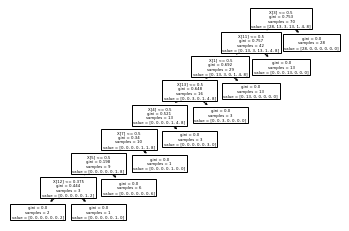

In [ ]:
tree.plot_tree(clf_tree)

from sklearn.tree.export import export_text
r = export_text(clf_tree, feature_names=['hair', 'feathers',	'eggs',	'milk',	'airbone',	'aquatic',	'predator',	'toothead',	'backbone',	'breathes',	'venomous',	'fins',	'legs',	'tail',	'domestic'])
print(r)

Algunas ventajas de los árboles de decisión son:
* Simple de entender e interpretar
* Requiere poca preparación de datos.
* El costo de usar el árbol (es decir, predecir datos) es logarítmico en la cantidad de puntos de datos utilizados para entrenar el árbol.
* Capaz de manejar datos numéricos y categóricos.
* Capaz de manejar problemas de múltiples salidas.
* Utiliza un modelo de caja blanca
* Posible validar un modelo utilizando pruebas estadísticas.

Y las desventajas de los árboles de decisión son:

* Se pueden crear árboles demasiado complejos que no generalizan bien los datos (sobreajuste)
* Pueden ser inestables, porque pequeñas variaciones en los datos pueden generar un árbol completamente diferente.
* Hay conceptos que son difíciles de aprender porque los árboles de decisión no los expresan fácilmente, como XOR, problemas de paridad o multiplexor.
* Se pueden crean árboles sesgados si algunas clases dominan.

#Comparación entre modelos

Se hace la comparación de la eficacia entre los modelos usados anteriormente a través de la evaluación por metricas como la matriz de confusión, la sensibilidad, la precisión entre otras.

##Matriz de Confusión

Esta metrica de evaluación sirve para comparar el numero de veces que el clasificador acierta en comparación con las que falla y el numero total de clasificaciones realizadas.
A partir de esta se obtiene la exactitud de la clasificación (accuracy)

In [ ]:
data={'Percetron':[per_accu, Per_Matriz],
      'Regresión logística':[log_accu, log_matriz],
      'SVM': [svm_accu, svm_matriz],
      'Polinomial': [svm_poly_accu, svm_poly_matriz],
      'Gausiana GMM': [svm_rbf_accu, svm_rbf_matriz],
      'Arboles Decisión': [tree_accu, tree_matriz]
      }

A continuación se presenta una tabla que muestra las metricas matriz de confusión y accuracy para los modelos presentados anteriormente

In [ ]:
comparacion=pd.DataFrame(data, index=['Accuracy', ' Matriz confusión'])
comparacion

,Percetron,Regresión logística,SVM,Polinomial,Gausiana GMM,Arboles Decisión
Accuracy,0.903226,0.806452,0.935484,0.903226,0.741935,0.935484
Matriz confusión,"[[13, 0, 0, 0, 0, 0], [0, 7, 0, 0, 0, 0], [0, ...","[[13, 0, 0, 0, 0, 0, 0], [0, 7, 0, 0, 0, 0, 0]...","[[13, 0, 0, 0, 0, 0], [0, 7, 0, 0, 0, 0], [0, ...","[[13, 0, 0, 0, 0, 0], [0, 7, 0, 0, 0, 0], [0, ...","[[13, 0, 0, 0, 0, 0], [0, 7, 0, 0, 0, 0], [2, ...","[[13, 0, 0, 0, 0, 0], [0, 7, 0, 0, 0, 0], [0, ..."


A modo de conclusión, los metodos de percetron, SVM y árboles de decisión son los que tienen una mayor precisión al momento de hacer las clasificaciones para este dataset y el comportamiento particular de los datos

AxesSubplot(0.125,0.657941;0.281818x0.222059)
AxesSubplot(0.125,0.391471;0.281818x0.222059)
AxesSubplot(0.547727,0.391471;0.281818x0.222059)
AxesSubplot(0.125,0.125;0.281818x0.222059)
AxesSubplot(0.547727,0.125;0.281818x0.222059)


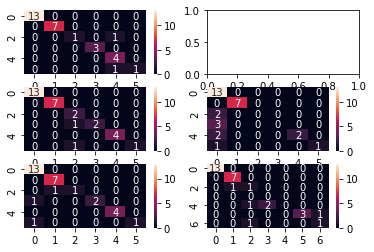

In [ ]:
import seaborn as sns
plt.plot([1, 2, 3])
plt.subplot(321)
hearmap_svm = sns.heatmap(pd.DataFrame(svm_matriz), annot=True, fmt="d")

plt.subplot(322)


print (hearmap_svm_poly)

plt.subplot(323)
hearmap_tree = sns.heatmap(pd.DataFrame(tree_matriz), annot=True, fmt="d")
print (hearmap_tree)

plt.subplot(324)
hearmap_svm_gaus = sns.heatmap(pd.DataFrame(svm_rbf_matriz), annot=True, fmt="d")
print (hearmap_svm_gaus)

plt.subplot(325)
hearmap_per = sns.heatmap(pd.DataFrame(Per_Matriz), annot=True, fmt="d")
print (hearmap_per)

plt.subplot(326)
hearmap_log_matriz = sns.heatmap(pd.DataFrame(log_matriz), annot=True, fmt="d")
print (hearmap_log_matriz)

##Otras metricas de evaluación

Finalmente, se muestran otros indicadores y metricas de evaluación al momento de evaluar la clasificación entre dstintos métodos.

###Exactitud

Describe la frecuencia con la que el clasificador acierta la predicción.

In [ ]:
prec_per = precision_score(y_test, y_pred_per, average=None)
prec_log = precision_score(y_test, y_pred_log, average=None)
prec_svm = precision_score(y_test, y_pred_svm, average=None)
prec_svm_poly = precision_score(y_test, y_pred_svm_poly, average=None)
prec_svm_rbf = precision_score(y_test, y_pred_svm_rbf, average=None)
prec_tree = precision_score(y_test, y_pred_tree, average=None)

print("Precisión perceptron:", prec_per)
print("Precisión regresión logistica:", prec_log)
print("Precisión SVM:", prec_svm)
print("Precisión SVM polinomial", prec_svm_poly)
print("precisión SVM gaussiana", prec_svm_rbf)



Precisión perceptron: [0.86666667 0.875      1.         1.         1.         1.        ]
Precisión regresión logistica: [1.         0.875      0.33333333 0.         0.         1.
 0.5       ]
Precisión SVM: [1.         1.         1.         1.         0.66666667 1.        ]
Precisión SVM polinomial [1.         0.875      0.33333333 1.         1.         1.        ]
precisión SVM gaussiana [0.61904762 1.         0.         0.         1.         1.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Sensibilidad o tasa verdadera positiva

Expresa cuán sensible es el clasificador para detectar predicciones acertadas.

In [ ]:
from sklearn.metrics import recall_score

sens_per = recall_score(y_test, y_pred_per, average=None)
sens_log = recall_score(y_test, y_pred_log, average=None)
sens_svm = recall_score(y_test, y_pred_svm, average=None)
sens_svm_poly = recall_score(y_test, y_pred_svm_poly, average=None)
sens_svm_rbf = recall_score(y_test, y_pred_svm_rbf, average=None)

print("sensibilidad perceptron:", sens_per)
print("sensibilidad regresión logistica:", sens_log)
print("sensibilidadSVM:", sens_svm)
print("sensibilidad SVM polinomial", sens_svm_poly)
print("sensibilidad SVM gaussiana", sens_svm_rbf)

sensibilidad perceptron: [1.         1.         0.5        0.66666667 1.         0.5       ]
sensibilidad regresión logistica: [1.   1.   0.5  0.   0.   0.75 0.5 ]
sensibilidadSVM: [1.  1.  0.5 1.  1.  0.5]
sensibilidad SVM polinomial [1.         1.         0.5        0.66666667 1.         0.5       ]
sensibilidad SVM gaussiana [1.  1.  0.  0.  0.5 0.5]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Puntaje de F1

Expresa el promedio ponderado entre la precisión y la sensiblidad.
Entre mayor puntuación se tiene un mejor modelo

In [ ]:
from sklearn.metrics import f1_score
score_per = f1_score(y_test, y_pred_per, average=None)
score_log = f1_score(y_test, y_pred_log, average=None)
score_svm = f1_score(y_test, y_pred_svm, average=None)
score_svm_poly = f1_score(y_test, y_pred_svm_poly, average=None)
score_svm_rbf = f1_score(y_test, y_pred_svm_rbf, average=None)

print("Puntaje perceptron:", score_per)
print("Puntaje regresión logistica:", score_log)
print("Puntaje SVM:", score_svm)
print("Puntaje SVM polinomial", score_svm_poly)
print("Puntaje SVM gaussiana", score_svm_rbf)


Puntaje perceptron: [0.92857143 0.93333333 0.66666667 0.8        1.         0.66666667]
Puntaje regresión logistica: [1.         0.93333333 0.4        0.         0.         0.85714286
 0.5       ]
Puntaje SVM: [1.         1.         0.66666667 1.         0.8        0.66666667]
Puntaje SVM polinomial [1.         0.93333333 0.4        0.8        1.         0.66666667]
Puntaje SVM gaussiana [0.76470588 1.         0.         0.         0.66666667 0.66666667]
